In [1]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# import csv file
data = pd.read_csv('telecom_customer.csv')

In [5]:
data.shape

(299, 36)

In [6]:
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        299 non-null    object 
 1   Gender                             299 non-null    object 
 2   Age                                299 non-null    int64  
 3   Married                            299 non-null    object 
 4   Number of Dependents               299 non-null    int64  
 5   City                               299 non-null    object 
 6   Zip Code                           299 non-null    int64  
 7   Latitude                           299 non-null    float64
 8   Longitude                          299 non-null    float64
 9   Number of Referrals                299 non-null    int64  
 10  Tenure in Months                   299 non-null    int64  
 11  Offer                              132 non-null    object 

In [8]:
#check for null values
pd.isnull(data).sum()

Customer ID                            0
Gender                                 0
Age                                    0
Married                                0
Number of Dependents                   0
City                                   0
Zip Code                               0
Latitude                               0
Longitude                              0
Number of Referrals                    0
Tenure in Months                       0
Offer                                167
Phone Service                          0
Avg Monthly Long Distance Charges     32
Multiple Lines                        32
Internet Service                       0
Internet Type                         55
Avg Monthly GB Download               55
Online Security                       55
Online Backup                         55
Device Protection Plan                55
Premium Tech Support                  55
Streaming TV                          55
Streaming Movies                      55
Streaming Music 

In [9]:
# drop null values
data.dropna(inplace=True)

In [10]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [18]:
# rename column
data.rename(columns={'City':'Cities'})

,Customer ID,Gender,Age,Married,Number of Dependents,Cities,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0422-UXFAP,Female,34,Yes,0,San Diego,92117,32.825086,-117.199424,1,...,One Year,Yes,Bank Withdrawal,98.85,4947.55,0.00,130,2433.72,7511.27,Stayed
295,0434-CSFON,Female,34,Yes,0,Los Angeles,90071,34.052917,-118.255178,3,...,Month-to-Month,Yes,Bank Withdrawal,100.50,4707.10,0.00,0,1793.05,6500.15,Stayed
296,0436-TWFFZ,Female,21,No,0,Long Beach,90805,33.864622,-118.179626,0,...,Two Year,Yes,Mailed Check,85.25,5714.20,1.31,0,583.57,6296.46,Stayed
297,0439-IFYUN,Female,78,No,0,Escondido,92027,33.141265,-116.967221,0,...,Month-to-Month,Yes,Bank Withdrawal,74.70,1294.60,0.00,20,379.62,1694.22,Stayed


In [19]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,47.767677,0.585859,93456.717172,35.889963,-119.511934,2.888889,34.030303,25.080909,27.626263,82.076768,3016.500000,0.919091,9.797980,868.531515,3893.910404
std,17.204549,1.059554,1686.748817,2.323791,2.169970,3.661406,25.256422,14.793661,20.965757,18.574186,2485.767987,4.499531,31.815148,878.627163,3116.869944
min,20.000000,0.000000,90003.000000,32.555828,-124.189977,0.000000,1.000000,1.230000,2.000000,44.300000,44.300000,0.000000,0.000000,1.230000,70.930000
25%,31.500000,0.000000,92122.000000,33.808371,-121.341049,0.000000,9.500000,12.315000,13.000000,70.175000,546.675000,0.000000,0.000000,138.525000,693.365000
50%,49.000000,0.000000,93437.000000,35.869626,-119.498771,1.000000,31.000000,25.260000,23.000000,84.650000,2438.600000,0.000000,0.000000,615.600000,3399.520000
75%,60.500000,1.000000,95087.000000,37.861931,-117.726215,6.000000,58.000000,38.240000,30.000000,96.700000,5366.925000,0.000000,0.000000,1390.725000,6534.395000
max,78.000000,3.000000,96121.000000,40.965011,-114.758334,10.000000,72.000000,48.910000,85.000000,116.000000,8496.700000,36.020000,140.000000,3482.640000,11979.340000


In [20]:
# use describe() for specific columns
data[['Gender','Married','City']].describe()

,Gender,Married,City
count,99,99,99
unique,2,2,86
top,Female,Yes,San Diego
freq,51,59,5


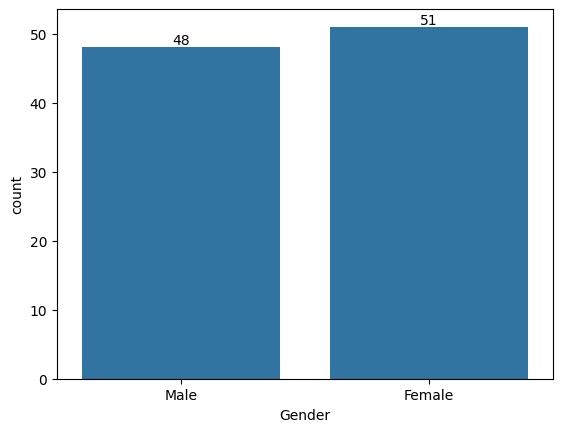

In [17]:
# plotting a bar chart for Gender and it's count
ax = sns.countplot(x = 'Gender', data = data)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Internet Type', ylabel='Age'>

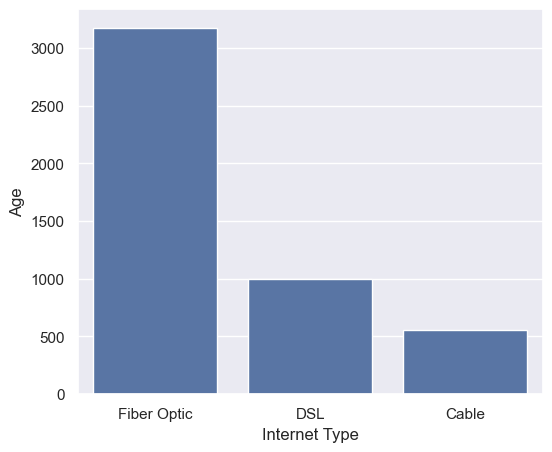

In [70]:
# plotting a bar chart for gender vs total amount

Type_age = data.groupby(['Internet Type'], as_index=False)['Age'].sum().sort_values(by='Age', ascending=False)

sns.barplot(x = 'Internet Type',y= 'Age', data = Type_age)

In [ ]:
# from above graphs we can see the most type of internet is fiber optic which means is high deman from customers 

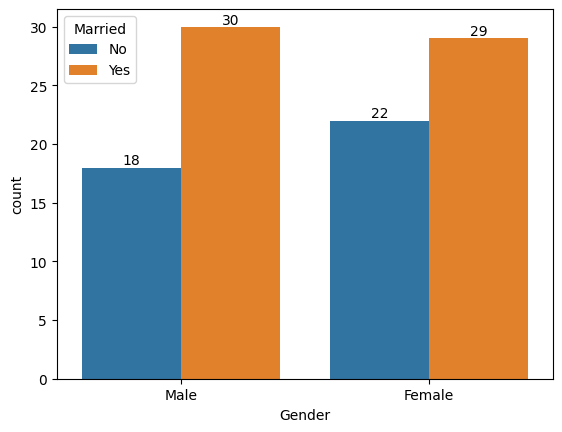

In [44]:
ax = sns.countplot(data = data, x = 'Gender', hue = 'Married')
for bars in ax.containers :
    ax.bar_label(bars)

<Axes: xlabel='Contract', ylabel='Zip Code'>

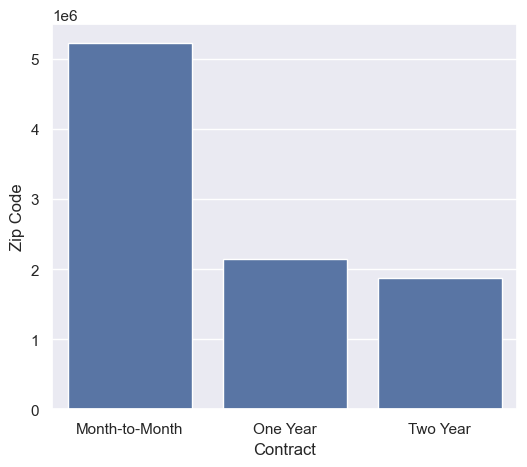

In [71]:
# Total Amount vs Age Group
sales_conrt = data.groupby(['Contract'], as_index=False)['Zip Code'].sum().sort_values(by='Zip Code', ascending=False)

sns.barplot(x = 'Contract',y= 'Zip Code' ,data = sales_conrt)

<Axes: xlabel='City', ylabel='Total Revenue'>

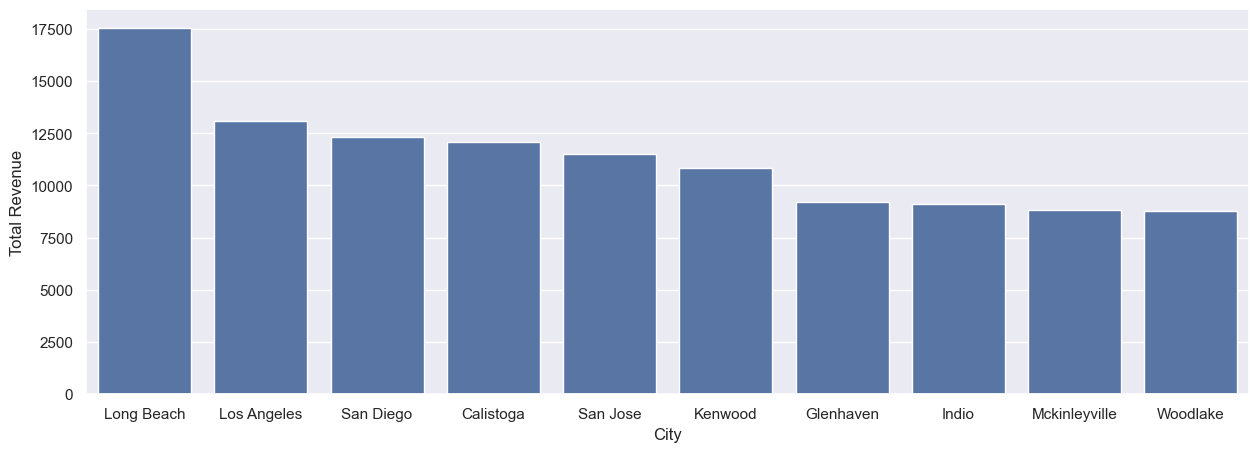

In [65]:
# total number of orders from top 10 states

sales_state = data.groupby(['City'], as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'City',y= 'Total Revenue')

In [ ]:
#From above graphs we can see the highest revenue in long beach.

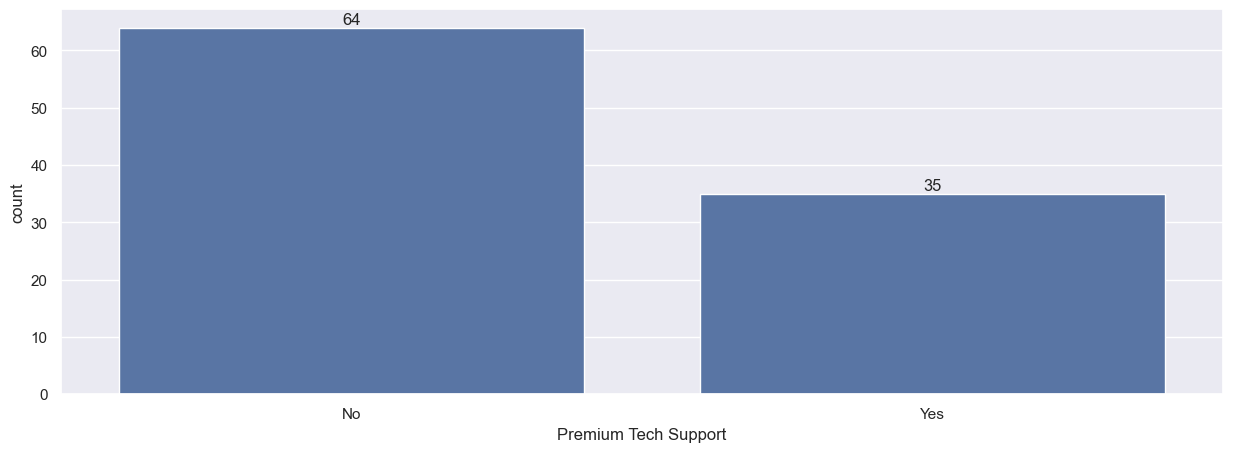

In [68]:
ax = sns.countplot(data = data, x = 'Premium Tech Support')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Premium Tech Support', ylabel='Total Revenue'>

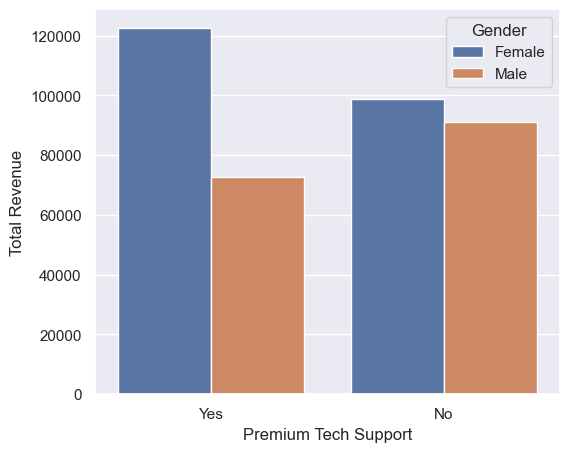

In [72]:
sales_rvn = data.groupby(['Premium Tech Support', 'Gender'], as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_rvn, x = 'Premium Tech Support',y= 'Total Revenue', hue='Gender')

In [ ]:
# we can see in Graph the most of those using premium tech support are female with the highest revenue